In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Econ Data Analysis Final Project.xlsx to Econ Data Analysis Final Project (3).xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('Econ Data Analysis Final Project.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Linear,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,Year,Team,Total Salary,Win Percentage,Additional Measure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2025,Angels,208420995,0.444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2025,Astros,232140003,0.537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.778826e-10,0.423919
3,NaN,2025,Athletics,78384241,0.469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.641037e-11,0.014966
4,NaN,2025,Blue Jays,255230406,0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.712637e-01,0.073122


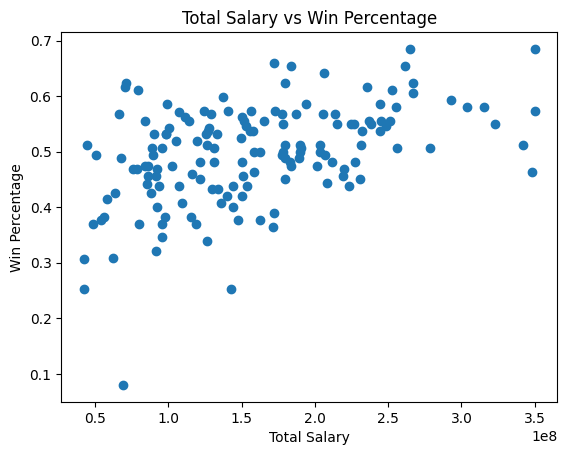

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# The current DataFrame `df` has 'Unnamed: X' as column headers,
# and the actual headers ('Total Salary', 'Win Percentage') are in the first row (index 0).
# We need to set the column names correctly and then drop the header row from the data.

# Store the potential column names from the first row
new_columns = df.iloc[0]

# Drop the first row (which contained the headers) and create a copy
df = df[1:].copy()

# Clean and assign column names: convert to string and strip whitespace for robustness
df.columns = [str(col).strip() if pd.notna(col) else col for col in new_columns]

# Convert the relevant columns to numeric types as they are likely strings after the above operation
df['Total Salary'] = pd.to_numeric(df['Total Salary'])
df['Win Percentage'] = pd.to_numeric(df['Win Percentage'])


# Scatter plot
plt.figure()
plt.scatter(df["Total Salary"], df["Win Percentage"])
plt.xlabel("Total Salary")
plt.ylabel("Win Percentage")
plt.title("Total Salary vs Win Percentage")

plt.show()

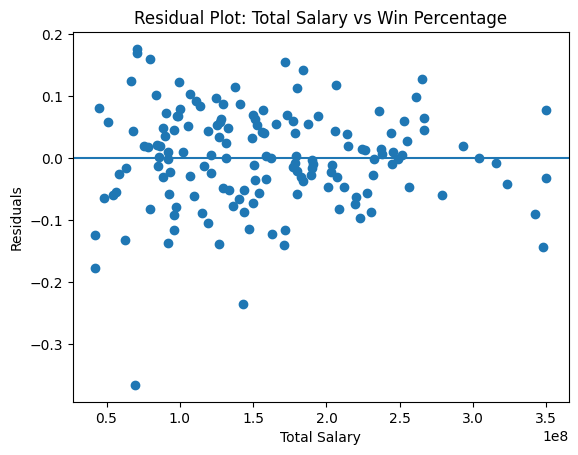

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define variables
X = df["Total Salary"]
y = df["Win Percentage"]

# Drop rows with NaN values from X and y before fitting the linear regression
# This ensures that polyfit receives clean data
cleaned_data = pd.DataFrame({'X': X, 'y': y}).dropna()
X_cleaned = cleaned_data['X']
y_cleaned = cleaned_data['y']

# Fit linear regression using cleaned data
coeffs = np.polyfit(X_cleaned, y_cleaned, 1)
y_hat = np.polyval(coeffs, X_cleaned)

# Compute residuals
residuals = y_cleaned - y_hat

# Residual plot
plt.figure()
plt.scatter(X_cleaned, residuals)
plt.axhline(0)
plt.xlabel("Total Salary")
plt.ylabel("Residuals")
plt.title("Residual Plot: Total Salary vs Win Percentage")

plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Define variables
X = df["Total Salary"]
y = df["Win Percentage"]

# Combine X and y into a single DataFrame to drop NaNs consistently
combined_data = pd.DataFrame({'Total Salary': X, 'Win Percentage': y}).dropna()

# Separate the cleaned data back into X and y
X_cleaned = combined_data['Total Salary']
y_cleaned = combined_data['Win Percentage']

# Add constant (intercept) to the cleaned X
X_cleaned = sm.add_constant(X_cleaned)

# Fit OLS regression using the cleaned data
model = sm.OLS(y_cleaned, X_cleaned).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Win Percentage   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     39.86
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           2.84e-09
Time:                        17:11:57   Log-Likelihood:                 171.65
No. Observations:                 154   AIC:                            -339.3
Df Residuals:                     152   BIC:                            -333.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4057      0.016     25.701   